In [1]:
import sklearn.datasets.california_housing as ch
import mpl_toolkits.basemap as bm
import numpy as np
import pylab as pl
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
dataset = ch.fetch_california_housing()

X = dataset.data
Y = dataset.target

print "Loaded data set with %d objects and %d variables" % (Y.shape[0], X.shape[1])
print "Coordinates ll=(%.3f, %3.f), ur=(%.3f, %.3f)" % (X[:, -1].min(), X[:, -2].min(), X[:, -1].max(), X[:, -2].max())

Loaded data set with 20640 objects and 8 variables
Coordinates ll=(-124.350,  33), ur=(-114.310, 41.950)


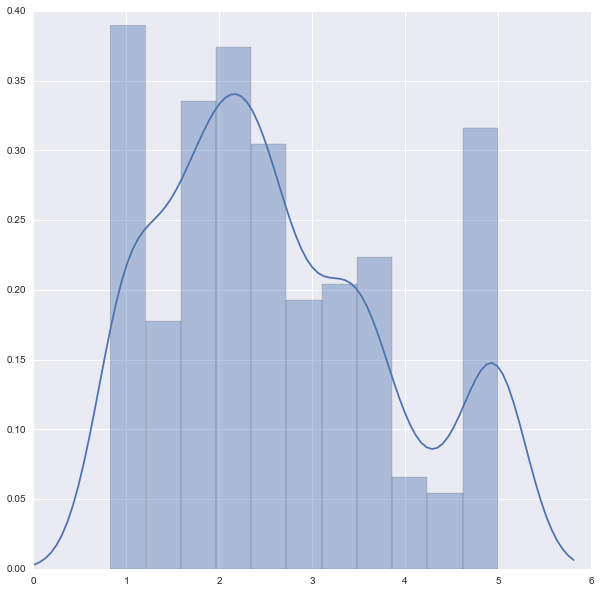

In [4]:
lllat, lllon = 33.704, -118.444
urlat, urlon = 33.931, -118.222

#lllat, lllon = 33, -125
#urlat, urlon = 42, -114

ind = np.logical_and(
    np.logical_and(X[:, -1] <= urlon, X[:, -1] >= lllon), 
    np.logical_and(X[:, -2] <= urlat, X[:, -2] >= lllat)
)

X_s = X[ind]
Y_s = Y[ind]

pl.figure(figsize=(10, 10))
sns.distplot(Y_s)
pl.show()

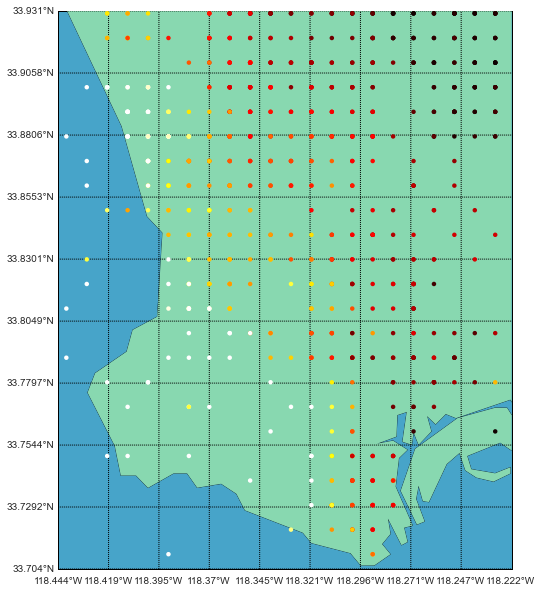

In [5]:
pl.figure(figsize=(10, 10))

m = bm.Basemap(
    llcrnrlon=lllon,
    llcrnrlat=lllat,
    urcrnrlon=urlon,
    urcrnrlat=urlat, 
    projection='merc',
    resolution='h'
)

m.drawcoastlines(linewidth=0.5)
m.drawmapboundary(fill_color='#47A4C9', zorder=1)
m.fillcontinents(color='#88D8B0',lake_color='#47A4C9', zorder=2)

parallels = np.linspace(lllat, urlat, 10)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.linspace(lllon, urlon, 10)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

colors = [pl.cm.hot(int((y - Y_s.min()) / (Y_s.max() - Y_s.min()) * 256)) for y in Y_s]
m.scatter(X_s[:, -1], X_s[:, -2], latlon=True, zorder=3, lw=0, c=colors)

# pl.annotate('San Francisco', xy=(0.04, 0.5), xycoords='axes fraction', color='white', size=15)
# pl.annotate('Los Angeles', xy=(0.4, 0.08), xycoords='axes fraction', color='white', size=15)

pl.show()

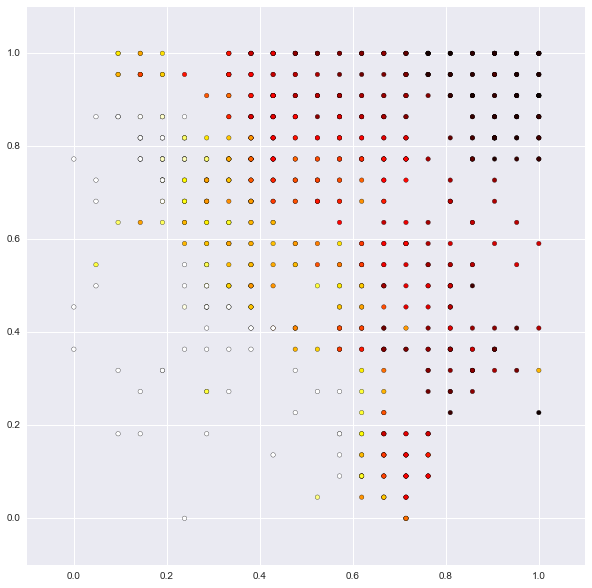

In [6]:
x_1 = (X_s[:, -1] - X_s[:, -1].min()) / (X_s[:, -1].max() - X_s[:, -1].min())
x_2 = (X_s[:, -2] - X_s[:, -2].min()) / (X_s[:, -2].max() - X_s[:, -2].min())

pl.figure(figsize=(10, 10))
pl.scatter(x_1, x_2, c=colors)
pl.xlim(-0.1, 1.1)
pl.ylim(-0.1, 1.1)
pl.show()

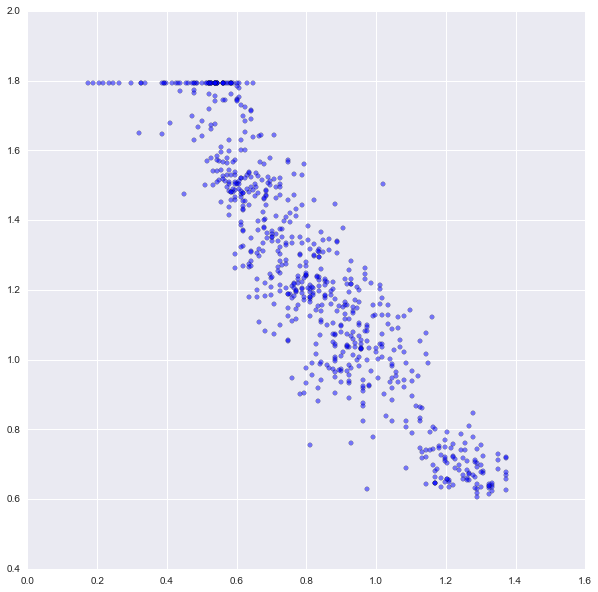

In [7]:
a = 5./np.sqrt(34)
b = 3.0/sqrt(34)

pl.figure(figsize=(10, 10))
pl.scatter(a * x_1 + b * x_2, np.log1p(Y_s), alpha=0.5)
pl.show()

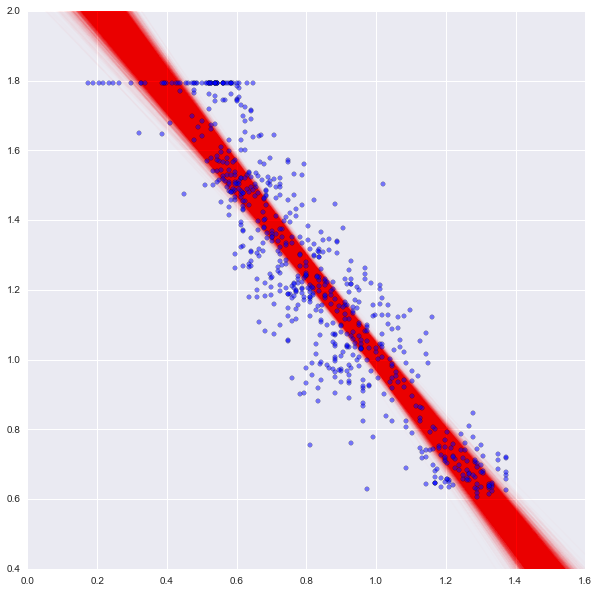

In [10]:
z = a * x_1 + b * x_2

pl.figure(figsize=(10, 10))
pl.scatter(z, np.log1p(Y_s), alpha=0.5, zorder=2)

for j in range(10000):
    ind = np.random.choice(np.arange(z.shape[0]), size=z.shape[0] * 0.1)
    #print ind
    z_s = z[ind]
    y_s = Y_s[ind]
    k, v = np.polyfit(z_s, np.log1p(y_s), 1)
    #print k, v
    pl.plot(np.linspace(0.0, 1.6, 100), k * np.linspace(0.0, 1.6, 100) + v, '-', c='r', alpha=0.01, zorder=1)    

pl.xlim(0.0, 1.6)
pl.ylim(0.4, 2.0)
pl.show()

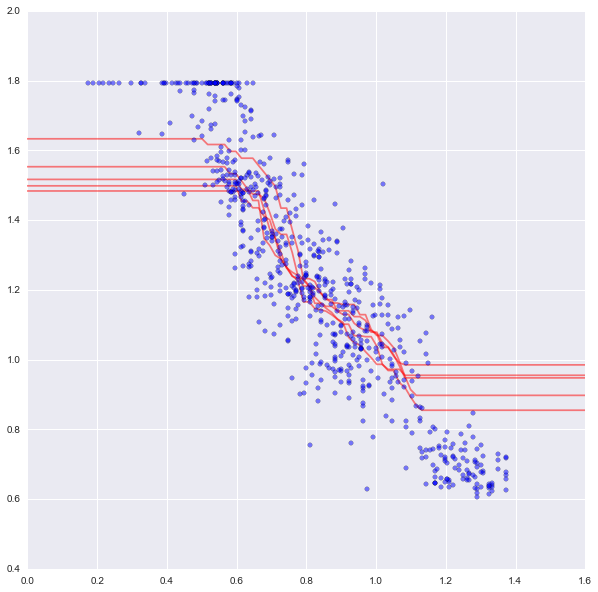

In [242]:
from sklearn.neighbors import KNeighborsRegressor

z = a * x_1 + b * x_2

pl.figure(figsize=(10, 10))
pl.scatter(z, np.log1p(Y_s), alpha=0.5, zorder=2)

K = 30
for j in range(5):
    ind = np.random.choice(np.arange(z.shape[0]), size=z.shape[0] * 0.1)
    #print ind
    z_s = z[ind][:, np.newaxis]
    # print z_s.shape
    y_s = Y_s[ind]
    # print y_s.shape
    nn = KNeighborsRegressor(n_neighbors=K)
    nn.fit(z_s, np.log1p(y_s))
    
    pred = np.zeros((100, 1))
    for i, zz in enumerate(np.linspace(0.0, 1.6, 100)):
        pred[i, 0] = nn.predict(zz)
        
    # print pred
        
    pl.plot(np.linspace(0.0, 1.6, 100), pred, '-', c='r', alpha=0.5, zorder=1)    

pl.xlim(0.0, 1.6)
pl.ylim(0.4, 2.0)
pl.show()